Area Plots, Histograms, and Bar Charts

Import Libraries

In [1]:
#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.3


Fetching Data

Dataset: Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website

In this lab, we will focus on the Canadian Immigration data and use the already cleaned dataset and can be fetched from here.

You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Panads skills Data pre-processing with Pandas

In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
#Let's take a look at the first five items in our dataset.

df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
#Let's find out how many entries there are in our dataset.

# print the dimensions of the dataframe
print(df_can.shape)

(195, 39)


In [5]:
#Set the country name as index - useful for quickly looking up countries using .loc method.

df_can.set_index('Country', inplace=True)

# Let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
#Notice now the country names now serve as indices.

print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [7]:
## finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

Area Plots
In the last module, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. With a little modification to the code, we can visualize this plot as a cumulative plot, also knows as a Stacked Line Plot or Area plot.

In [8]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN, i.e. not a number, values will default to 0). To produce an unstacked plot, set parameter stacked to value False.

In [ ]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter.

In [ ]:
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Two types of plotting
As we discussed in the video lectures, there are two styles/options of plotting with matplotlib， plotting using the Artist layer and plotting using the scripting layer.

Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt'

You can use plt i.e. matplotlib.pyplot and add more elements by calling different methods procedurally; for example, plt.title(...) to add title or plt.xlabel(...) to add label to the x-axis.

    

In [ ]:
# Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')

Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred)

You can use an Axes instance of your current plot and store it in a variable (eg. ax). You can add more elements by calling methods with a little change in syntax (by adding "set_" to the previous methods). For example, use ax.set_title() instead of plt.title() to add title, or ax.set_xlabel() instead of plt.xlabel() to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later).

In this course, we will stick to the scripting layer, except for some advanced visualizations where we will need to use the artist layer to manipulate advanced aspects of the plots.

In [ ]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Question: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

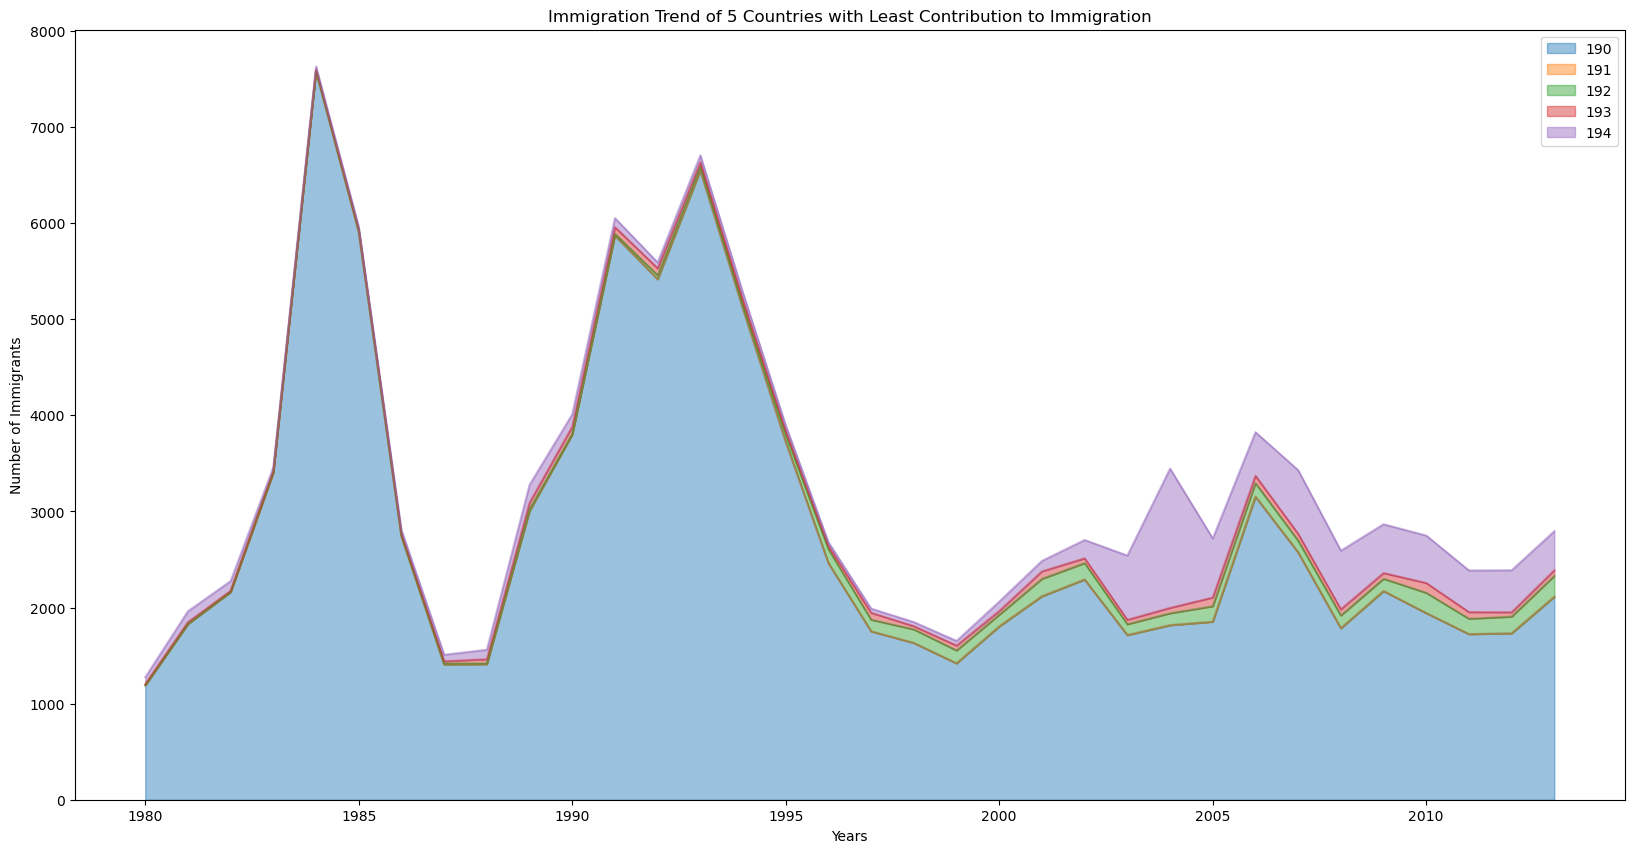

In [8]:


import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

# Define the range of years as strings (to match column names)
years = list(map(str, range(1980, 2014)))

# Get the 5 countries with the least contribution
df_least5 = df_can.tail(5)  # Ensure df_can is correctly structured

# Transpose the dataframe (years become rows)
df_least5 = df_least5[years].transpose()

# Convert the index to integer type for proper plotting
df_least5.index = df_least5.index.map(int)

# Create the stacked area plot
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10))

# Add labels and title
plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# Show the plot
plt.show()


Question: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

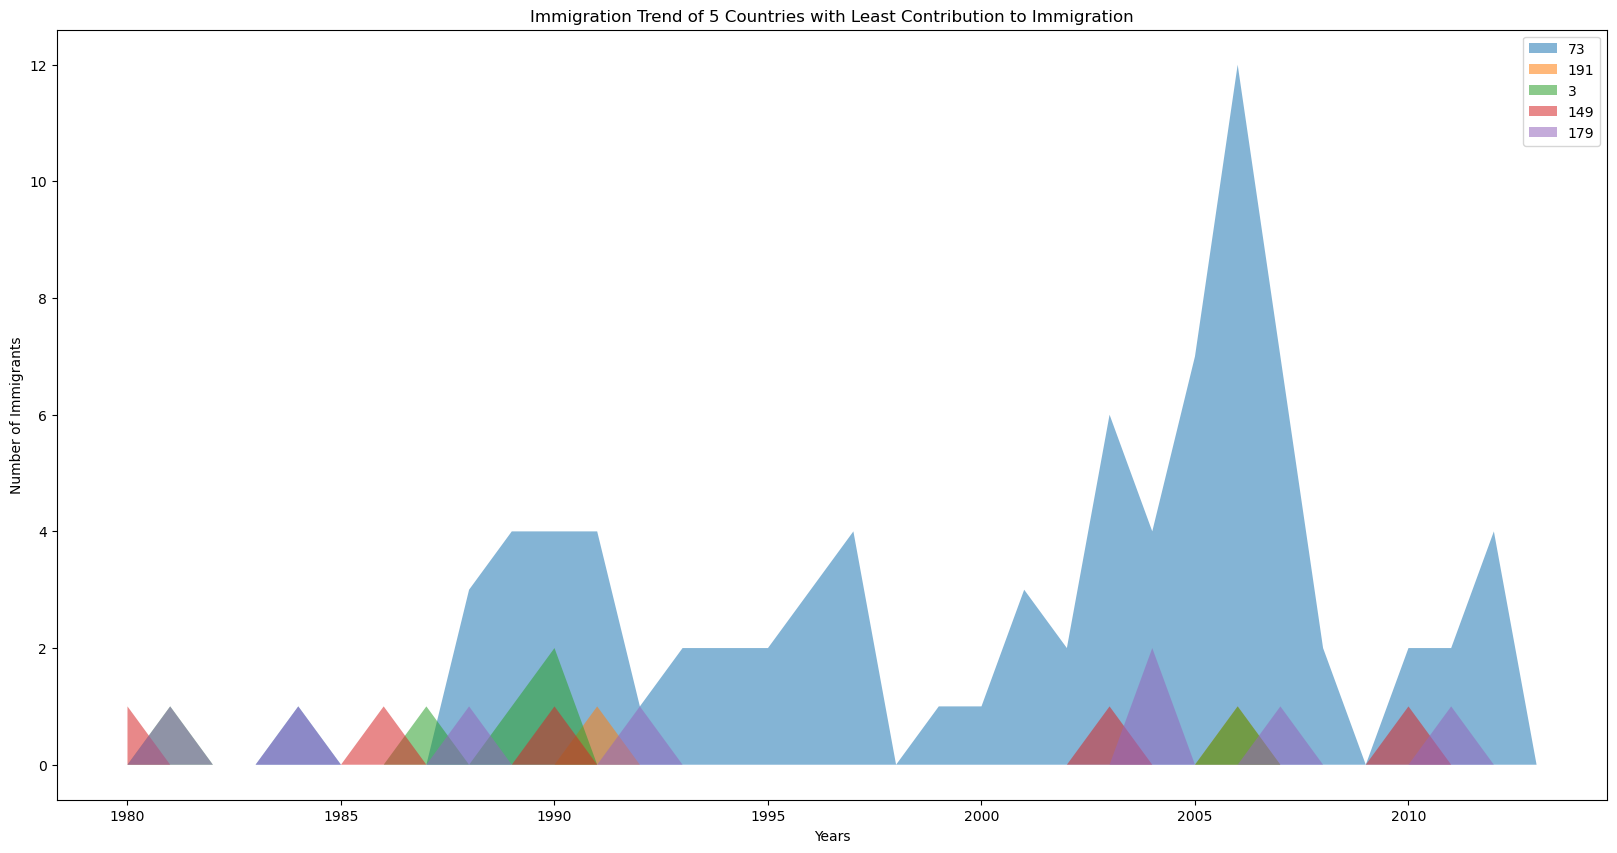

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

# Define the range of years as strings (to match column names)
years = list(map(str, range(1980, 2014)))

# Get the 5 countries with the least contribution (sorted by the most recent year)
df_least5 = df_can.sort_values(by=years[-1], ascending=True).head(5)

# Transpose the dataframe (years become rows)
df_least5 = df_least5[years].transpose()

# Convert the index to integer type for proper plotting
df_least5.index = df_least5.index.map(int)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Generate an unstacked area plot using the artist layer
for country in df_least5.columns:
    ax.fill_between(df_least5.index, df_least5[country], alpha=0.55, label=country)

# Add labels and title
ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# Add a legend
ax.legend()

# Show the plot
plt.show()


Histograms
A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

Question: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

Before we proceed with creating the histogram plot, let's first examine the data split into intervals. To do this, we will us Numpy's histrogram method to get the bin ranges and frequency counts as follows:

In [10]:
# let's quickly view the 2013 data
df_can['2013'].head()

0    2004
1     603
2    4331
3       0
4       1
Name: 2013, dtype: int64

Frequency counts: [178  11   1   2   0   0   0   0   1   2]
Bin edges: [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


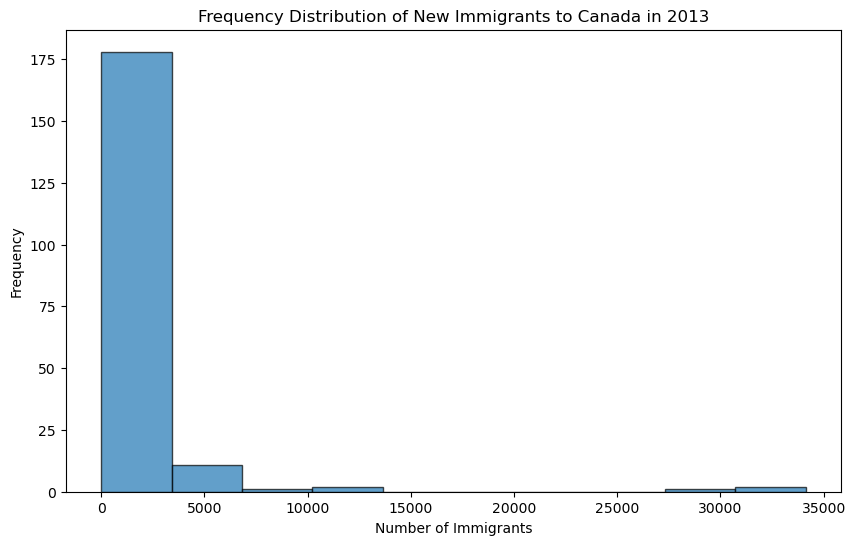

In [13]:
import pandas as pd
import numpy as np  # Import NumPy
import matplotlib.pyplot as plt

# Load the dataset
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

# Extract immigration data for 2013
immigration_2013 = df_can['2013']

# Use NumPy's histogram method to compute bin ranges and frequencies
count, bin_edges = np.histogram(immigration_2013, bins=10)  # Default = 10 bins

# Print frequency count and bin ranges
print("Frequency counts:", count)
print("Bin edges:", bin_edges)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(immigration_2013, bins=10, edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Frequency Distribution of New Immigrants to Canada in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Frequency')

# Show the plot
plt.show()


Question: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')
     1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  2004  \
50    272   293   299   106    93    73    93   109   129   129  ...    89   
128   116    77   106    51    31    54    56    80    73    76  ...    73   
167   281   308   222   176   128   158   187   198   171   182  ...   129   

     2005  2006  2007  2008  2009  2010  2011  2012  2013  
50     62   101    97   108    81    92    93    94    81  
128    57    53    73    66    75    46    49    53    59  
167   205   139   193   165   167   159   134   140   140  

[3 rows x 34 columns]


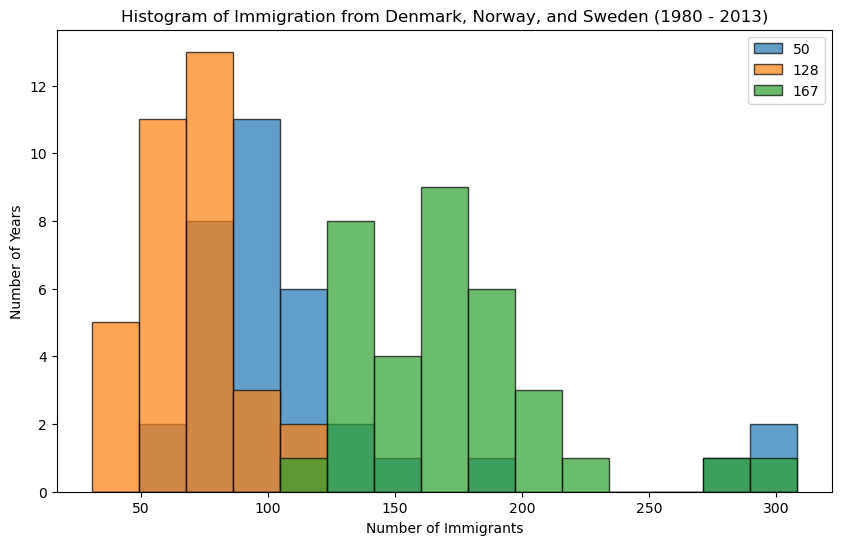

In [18]:
import pandas as pd
import numpy as np  # Import NumPy
import matplotlib.pyplot as plt

# Load the dataset
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

# Check the country column name to make sure it is 'Country'
print(df_can.columns)  # This will list the column names

# Define the years as a list of strings
years = list(map(str, range(1980, 2014)))

# Filter data for Denmark, Norway, and Sweden (ensure country names are in 'Country' column)
df_scandinavia = df_can[df_can['Country'].isin(['Denmark', 'Norway', 'Sweden'])]

# View the immigration data for Denmark, Norway, and Sweden
print(df_scandinavia[years].head())  # Check if data is correctly filtered

# Transpose the dataframe for easier plotting (years as rows)
df_t = df_scandinavia[years].transpose()

# Generate the histogram plot
df_t.plot(kind='hist', figsize=(10, 6), bins=15, alpha=0.7, edgecolor='black')

# Add labels and title
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden (1980 - 2013)')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

# Show the plot
plt.show()


In [ ]:
Let's make a few modifications to improve the impact and aesthetics of the previous plot:

increase the bin size to 15 by passing in bins parameter;
set transparency to 60% by passing in alpha parameter;
label the x-axis by passing in x-label parameter;
change the colors of the plots by passing in color parameter.


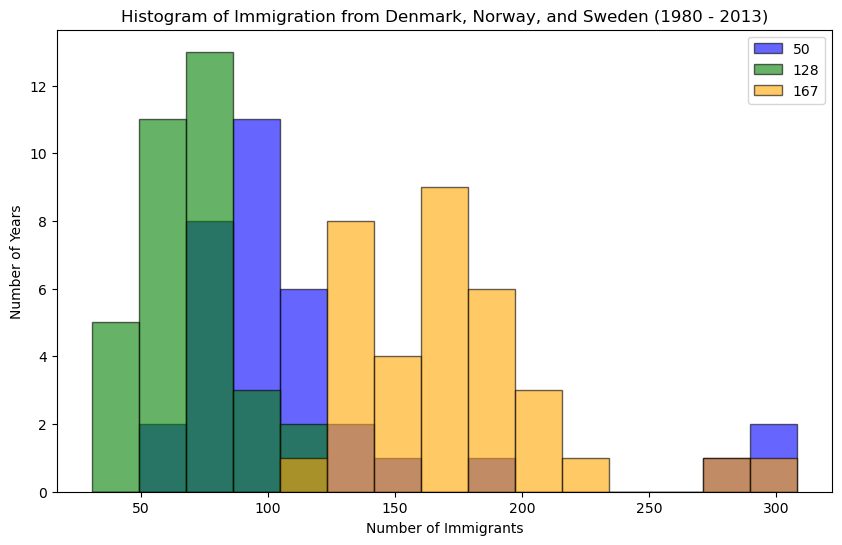

In [21]:
import pandas as pd
import numpy as np  # Import NumPy
import matplotlib.pyplot as plt

# Load the dataset
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

# Define the years as a list of strings
years = list(map(str, range(1980, 2014)))

# Filter data for Denmark, Norway, and Sweden
df_scandinavia = df_can[df_can['Country'].isin(['Denmark', 'Norway', 'Sweden'])]

# Transpose the dataframe for easier plotting (years as rows)
df_t = df_scandinavia[years].transpose()

# Generate the histogram plot
df_t.plot(kind='hist', figsize=(10, 6), bins=15, alpha=0.6, edgecolor='black', 
          color=['blue', 'green', 'orange'])

# Add labels and title
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden (1980 - 2013)')
plt.xlabel('Number of Immigrants')  # Label x-axis
plt.ylabel('Number of Years')  # Label y-axis

# Show the plot
plt.show()


Question: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

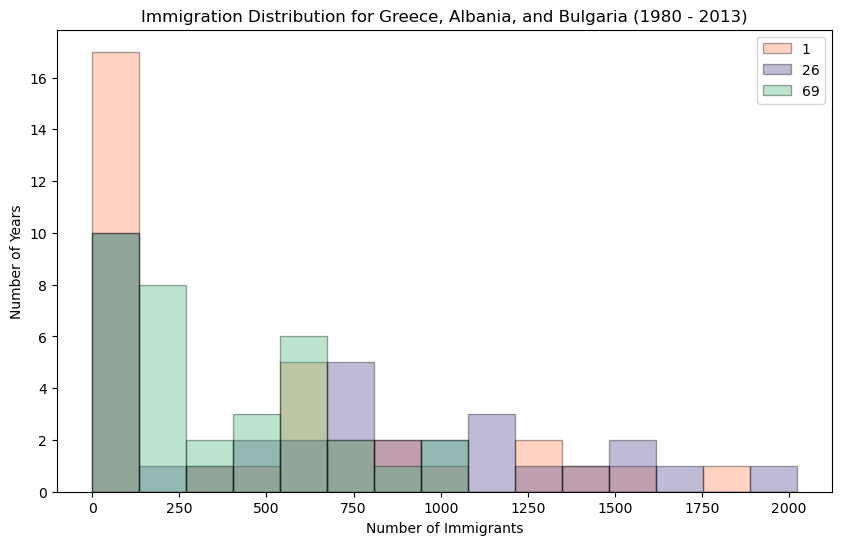

In [23]:
import pandas as pd
import numpy as np  # Import NumPy
import matplotlib.pyplot as plt

# Load the dataset
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

# Define the years as a list of strings
years = list(map(str, range(1980, 2014)))

# Filter data for Greece, Albania, and Bulgaria
df_countries = df_can[df_can['Country'].isin(['Greece', 'Albania', 'Bulgaria'])]

# Transpose the dataframe for easier plotting (years as rows)
df_t = df_countries[years].transpose()

# Plot the overlapping histogram
df_t.plot(kind='hist', figsize=(10, 6), bins=15, alpha=0.35, edgecolor='black', 
          color=['coral', 'darkslateblue', 'mediumseagreen'])

# Add labels and title
plt.title('Immigration Distribution for Greece, Albania, and Bulgaria (1980 - 2013)')
plt.xlabel('Number of Immigrants')  # Label x-axis
plt.ylabel('Number of Years')  # Label y-axis

# Show the plot
plt.show()


Bar Charts (Dataframe) 
A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via kind parameter in plot():

kind=bar creates a vertical bar plot
kind=barh creates a horizontal bar plot
Vertical bar plot

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

Let's start off by analyzing the effect of Iceland's Financial Crisis:

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.



In [ ]:
Question: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

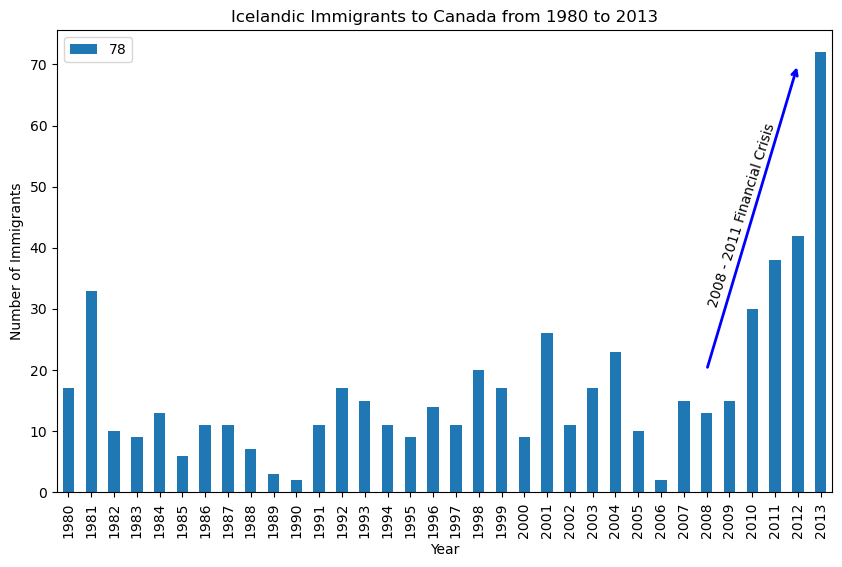

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

# Define the years
years = list(map(str, range(1980, 2014)))

# Step 1: Get the data for Iceland
df_iceland = df_can.loc[df_can['Country'] == 'Iceland', years].transpose()

# Step 2: Plot the bar chart for Icelandic immigrants
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate the arrow indicating the impact of the Financial Crisis
plt.annotate('',  # Leave blank for no text in the annotation
             xy=(32, 70),  # Arrow head (year 2012, population ~70)
             xytext=(28, 20),  # Arrow base (year 2008, population ~20)
             xycoords='data',  # Use data coordinate system
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)  # Arrow style
             )

# Annotate the text for the Financial Crisis
plt.annotate('2008 - 2011 Financial Crisis',  # Text to display
             xy=(28, 30),  # Position of the text
             rotation=72.5,  # Rotate text for proper alignment
             va='bottom',  # Vertical alignment
             ha='left',  # Horizontal alignment
             )

# Show the plot
plt.show()


Horizontal Bar Plot

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to label categorical variables.

Question: Using the scripting later and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [25]:
import pandas as pd

# Load the dataset
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

# Define the years to sum the immigrant data
years = list(map(str, range(1980, 2014)))

# Calculate the total number of immigrants for each country
df_can['Total'] = df_can[years].sum(axis=1)

# Sort the countries by the total number of immigrants in descending order and select top 15
df_top15 = df_can[['Country', 'Total']].sort_values(by='Total', ascending=False).head(15)

# View the data for the top 15 countries
df_top15


,Country,Total
79,India,691904
36,China,659962
183,United Kingdom of Great Britain and Northern I...,551500
136,Philippines,511391
130,Pakistan,241600
185,United States of America,241122
81,Iran (Islamic Republic of),175923
162,Sri Lanka,148358
140,Republic of Korea,142581
137,Poland,139241


Step 2: Plot data:

Use kind='barh' to generate a bar chart with horizontal bars.
Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

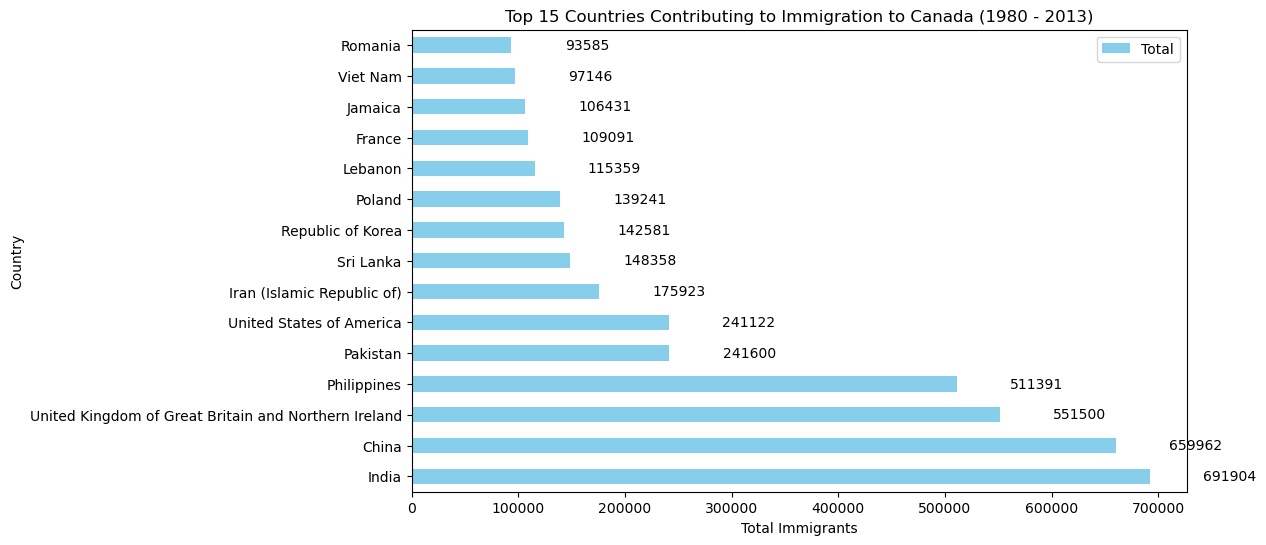

In [26]:
# Create the horizontal bar plot
df_top15.plot(kind='barh', x='Country', y='Total', figsize=(10, 6), color='skyblue')

# Label the x-axis and y-axis
plt.xlabel('Total Immigrants')
plt.ylabel('Country')
plt.title('Top 15 Countries Contributing to Immigration to Canada (1980 - 2013)')

# Annotate the total immigrant count for each country
for index, value in enumerate(df_top15['Total']):
    plt.text(value + 50000, index, str(value), va='center', color='black')

# Show the plot
plt.show()